In [40]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import umap
from scipy import stats
pd.set_option('display.max_rows', 50)
np.set_printoptions(threshold=50)
import joblib
from scipy.stats import fisher_exact
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from matplotlib import cm
import statsmodels.api as sm
import pickle
from joblib import dump
from matplotlib.sankey import Sankey
import plotly.graph_objects as go
from joblib import load
import plotly.io as pio

# Load analysis datasets

In [41]:
with open('df_kmeans_rdm42_traditional5_diagnosis.pkl', 'rb') as f:
    df = pickle.load(f)

In [42]:
with open('umap_results_diagnosis.pkl', 'rb') as file:
    X_embedded = pickle.load(file)

In [43]:
loaded_umap_model = load('umap_model_diagnosis.joblib')

Wed Oct 30 19:35:43 2024 Building and compiling search function


# UMAP Visualization - AD Status

In [44]:
df['isAD'] = 'AD Patient'

In [45]:
labels = df['isAD']

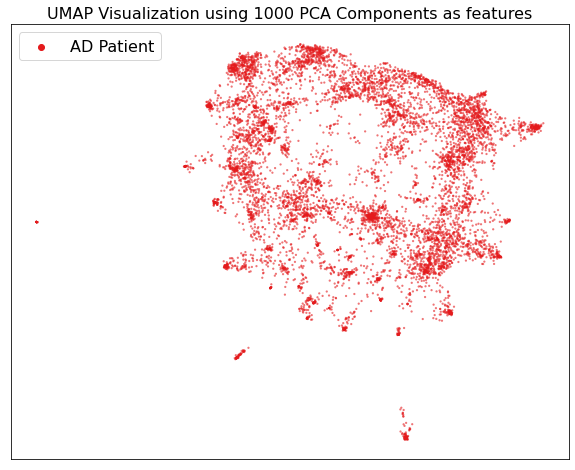

In [46]:
with sns.color_palette("Set1"):
    fig = plt.figure(figsize=(10,8))
    
    np.random.seed(1)
    reordered_indices = np.arange(X_embedded.shape[0])
    np.random.shuffle(reordered_indices)
    
    sns.scatterplot(x = X_embedded[reordered_indices ,0], y = X_embedded[reordered_indices ,1], 
                    hue = labels[reordered_indices],
                    s=5, linewidth = .0, alpha = .6,
                    palette="Set1"
                   )
    ax = plt.gca()
    ax.set(xticks=[], yticks=[], facecolor='white')
    plt.title("UMAP Visualization using 1000 PCA Components as features", fontsize=16)
    ax.legend(title='', loc='upper left', fontsize=16)

## UMAP Visualization - Number of diagnoses

In [47]:
def categorize_age(count):
    if count <= 85:
        return '<=85'
    elif 86 <= count <= 90:
        return '86-90'
    else:
        return '91<='

In [48]:
# Categorize the number of diagnosis
df['age_category'] = df['Age'].apply(categorize_age)

In [49]:
labels = df['age_category']

In [50]:
labels

PatientID
D0003B2687D8F9    86-90
D000D5B83D9620     91<=
D000D6884BD199    86-90
D0016F824B7B74     91<=
D00195531E21B1     91<=
                  ...  
DFFCD874260A78     91<=
DFFE6A5DC77E11     <=85
DFFF132A593DAB    86-90
DFFF5E0FC34DAC    86-90
DFFF9C7D9654FE    86-90
Name: age_category, Length: 8363, dtype: object

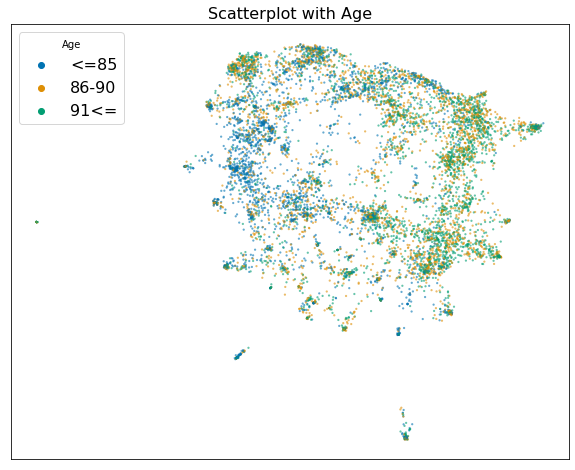

In [51]:
with sns.color_palette("colorblind"):
    fig = plt.figure(figsize=(10,8))
    
    np.random.seed(1)
    reordered_indices = np.arange(X_embedded.shape[0])
    np.random.shuffle(reordered_indices)
    
    sns.scatterplot(x = X_embedded[reordered_indices ,0], y = X_embedded[reordered_indices ,1], 
                    hue = labels[reordered_indices], hue_order=['<=85', '86-90', '91<='],
                    s=5, linewidth = .0, alpha = .6,
                    palette="colorblind"
                   )
    ax = plt.gca()
    ax.set(xticks=[], yticks=[], facecolor='white')
    ax.legend(title='Age', loc='upper left', fontsize=16)
    plt.title("Scatterplot with Age", fontsize=16)

## UMAP Visualization - Number of diagnoses

In [52]:
def categorize_diagnosis(count):
    if count <= 10:
        return '<=10'
    elif 11 <= count <= 49:
        return '11-49'
    else:
        return '50<='

In [53]:
# Categorize the number of diagnosis
df['diagnosis_category'] = df['#diagnosis'].apply(categorize_diagnosis)

In [54]:
labels = df['diagnosis_category']

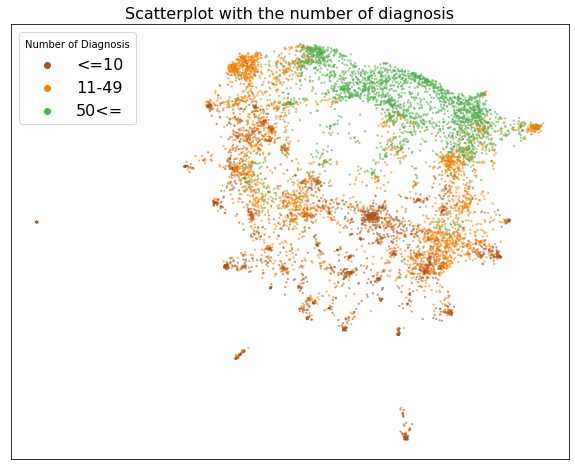

In [55]:
with sns.color_palette("Set1_r"):
    fig = plt.figure(figsize=(10,8))
    
    np.random.seed(1)
    reordered_indices = np.arange(X_embedded.shape[0])
    np.random.shuffle(reordered_indices)
    
    sns.scatterplot(x = X_embedded[reordered_indices ,0], y = X_embedded[reordered_indices ,1], 
                    hue = labels[reordered_indices], hue_order=['<=10', '11-49', '50<='],
                    s=5, linewidth = .0, alpha = .6,
                    palette="Set1_r"
                   )
    ax = plt.gca()
    ax.set(xticks=[], yticks=[], facecolor='white')
    ax.legend(title='Number of Diagnosis', loc='upper left', fontsize=16)
    plt.title("Scatterplot with the number of diagnosis", fontsize=16)

## UMAP Visualization - Number of diagnoses

In [56]:
labels = df['Sex']

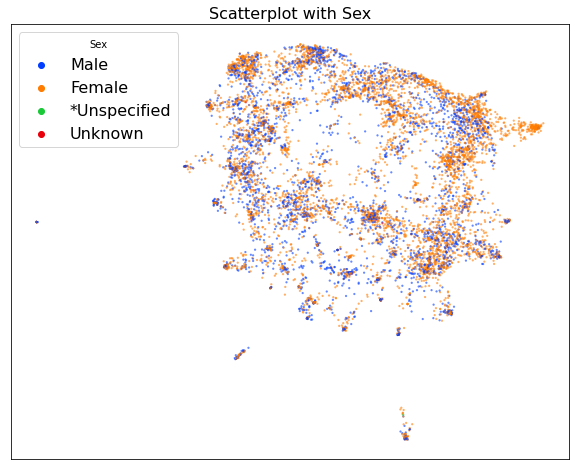

In [57]:
with sns.color_palette("bright"):
    fig = plt.figure(figsize=(10,8))
    
    np.random.seed(1)
    reordered_indices = np.arange(X_embedded.shape[0])
    np.random.shuffle(reordered_indices)
    
    sns.scatterplot(x = X_embedded[reordered_indices ,0], y = X_embedded[reordered_indices ,1], 
                    hue = labels[reordered_indices],
                    s=5, linewidth = .0, alpha = .6,
                    palette="bright"
                   )
    ax = plt.gca()
    ax.set(xticks=[], yticks=[], facecolor='white')
    ax.legend(title='Sex', loc='upper left', fontsize=16)
    plt.title("Scatterplot with Sex", fontsize=16)

In [22]:
df['Sex'].unique()

array(['Female', 'Male', 'Unknown', '*Unspecified'], dtype=object)

In [9]:
# 年齢に関する統計量
age_stats = df['Age'].agg(['mean', 'std', 'min', 'max', 'median']).rename('Age')

In [10]:
Ndiagnosis_stats = df['#diagnosis'].agg(['mean', 'std', 'min', 'max', 'median']).rename('#diagnosis')

In [11]:
Ndiagnosis_stats

mean       53.586392
std        78.490722
min         1.000000
max       978.000000
median     23.000000
Name: #diagnosis, dtype: float64

In [12]:
# カテゴリカルデータの集計
sex_counts = df['Sex'].value_counts().to_frame().T
sex_counts.index = ['Sex']

race_counts = df['Race'].value_counts().to_frame().T
race_counts.index = ['Race']

death_status_counts = df['Death_Status'].value_counts().to_frame().T
death_status_counts.index = ['Death_Status']


In [13]:
# デモグラフィックテーブルを作成
demographic_table = pd.concat([age_stats, sex_counts, race_counts, death_status_counts])

# 結果の表示
print(demographic_table)


                       0  *Unspecified   Alive  \
mean           86.449719           NaN     NaN   
std             6.391923           NaN     NaN   
min            65.000000           NaN     NaN   
max            91.000000           NaN     NaN   
median         90.000000           NaN     NaN   
Sex                  NaN           6.0     NaN   
Race          205.000000           NaN     NaN   
Death_Status         NaN           NaN  6280.0   

              American Indian or Alaska Native  Asian  \
mean                                       NaN    NaN   
std                                        NaN    NaN   
min                                        NaN    NaN   
max                                        NaN    NaN   
median                                     NaN    NaN   
Sex                                        NaN    NaN   
Race                                       9.0  876.0   
Death_Status                               NaN    NaN   

              Black or African Amer

In [14]:
# カテゴリカルデータの割合を計算
sex_percent = df['Sex'].value_counts(normalize=True).mul(100).to_frame().T
sex_percent.index = ['Sex (%)']

race_percent = df['Race'].value_counts(normalize=True).mul(100).to_frame().T
race_percent.index = ['Race (%)']

death_status_percent = df['Death_Status'].value_counts(normalize=True).mul(100).to_frame().T
death_status_percent.index = ['Death_Status (%)']

# 割合を結合
demographic_table_percent = pd.concat([age_stats, sex_counts, sex_percent, race_counts, race_percent, death_status_counts, death_status_percent])

print(demographic_table_percent)


                           0  *Unspecified       Alive  \
mean               86.449719           NaN         NaN   
std                 6.391923           NaN         NaN   
min                65.000000           NaN         NaN   
max                91.000000           NaN         NaN   
median             90.000000           NaN         NaN   
Sex                      NaN      6.000000         NaN   
Sex (%)                  NaN      0.071745         NaN   
Race              205.000000           NaN         NaN   
Race (%)            2.451273           NaN         NaN   
Death_Status             NaN           NaN  6280.00000   
Death_Status (%)         NaN           NaN    75.09267   

                  American Indian or Alaska Native      Asian  \
mean                                           NaN        NaN   
std                                            NaN        NaN   
min                                            NaN        NaN   
max                                        

In [15]:
df = df.reset_index()

In [16]:
df_subset = df[['#diagnosis', 'Age','Sex', 'Race', 'Death_Status', 'Cluster', 'diagnosis_category','PatientID','isAD']]

In [17]:
df_subset.to_csv('demographic_data.csv', index=False)